In [11]:
# write python code to open my jobs.json and resources.json files into dataframes
import json
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

jobs_df = pd.read_json('../data/input/jobs.json')
resources_df = pd.read_json('../data/input/resources.json')

In [8]:
print('Number of resources', resources_df.shape[0])
print('Number of Jobs', jobs_df.shape[0])

Number of resources 241
Number of Jobs 915


In [17]:
resources_df.columns.tolist()

['attributes',
 'Id',
 'OwnerId',
 'IsDeleted',
 'Name',
 'CurrencyIsoCode',
 'CreatedDate',
 'CreatedById',
 'LastModifiedDate',
 'LastModifiedById',
 'SystemModstamp',
 'strk__Enable_Resource_For__c',
 'strk__User__c',
 'strk__Mobile_Policy_Accepted__c',
 'strk__Enable_Granular_Time_Tracking__c',
 'strk__Enable_Automated_Time_Entry__c',
 'strk__Active__c',
 'strk__Enable_Live_Location__c',
 'strk__Is_a_Job_Planner_Resource__c',
 'strk__Last_Known_Location__c',
 'strk__Type__c',
 'OracleDepartment__c',
 'strk__Site__c',
 'strk__Expense_Policy__c',
 'strk__Calendar__c',
 'strk__Event_Type__c',
 'strk__Full_Address__c',
 'strk__Last_Known_Location_Time__c',
 'strk__Last_Known_Location__Latitude__s',
 'strk__Last_Known_Location__Longitude__s',
 'strk__Street_Address__c']

Text(0.5, 1.0, '% of Null Values in Resources')

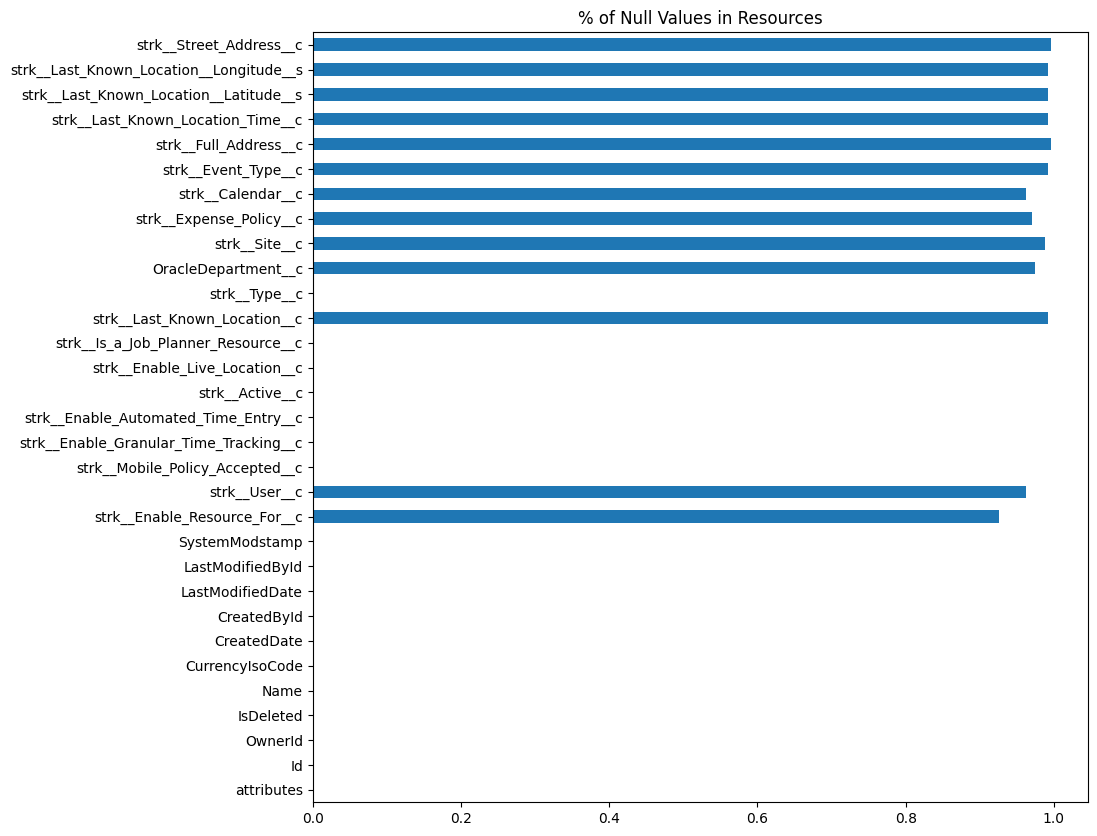

In [18]:
# plot the percentage of missing values in each column
(resources_df.isna().sum() / len(resources_df)).plot(kind='barh', figsize=(10, 10))
plt.title('% of Null Values in Resources')


<Axes: >

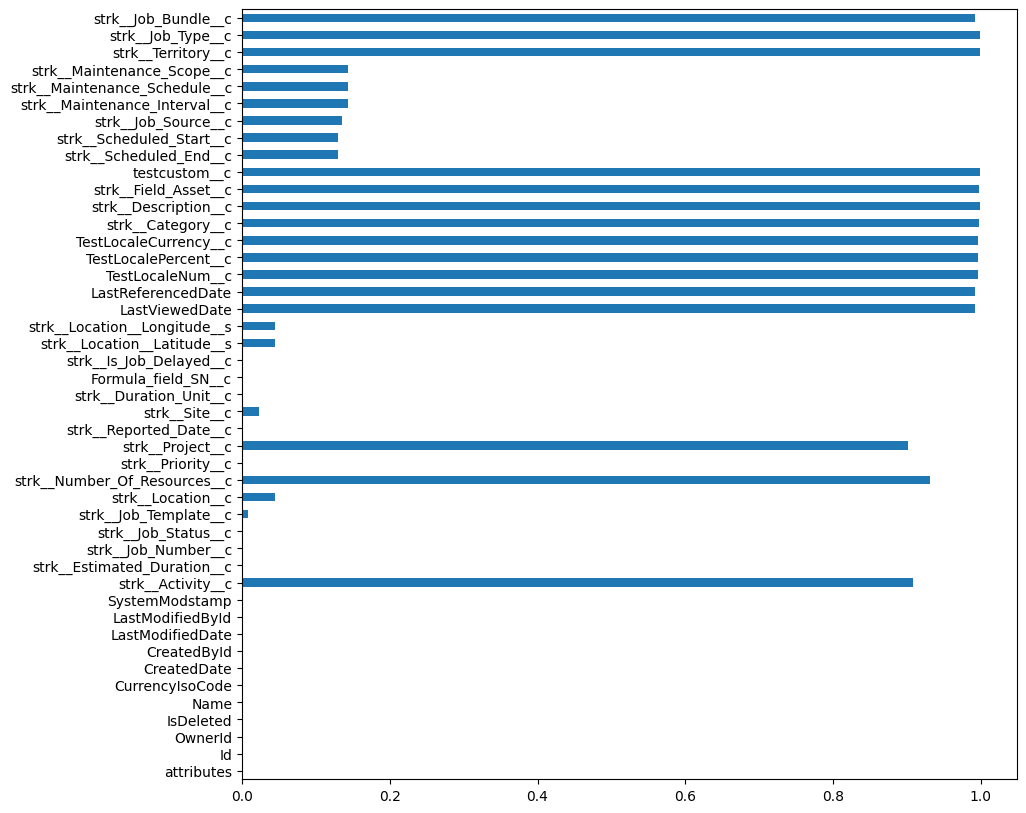

In [51]:
# plot the percentage of missing values in each column
(jobs_df.isna().sum() / len(jobs_df)).plot(kind='barh', figsize=(10, 10)) 

In [21]:
jobs_df[['strk__Location__Longitude__s', 'strk__Location__Latitude__s']]

,strk__Location__Longitude__s,strk__Location__Latitude__s
0,NaN,NaN
1,NaN,NaN
2,-75.590683,43.217778
3,NaN,NaN
4,-122.141362,37.428103
...,...,...
910,-122.141362,37.428103
911,-122.141362,37.428103
912,NaN,NaN
913,NaN,NaN


In [23]:
import folium
import pandas as pd
from IPython.display import display


In [32]:
df = jobs_df[['strk__Location__Longitude__s', 'strk__Location__Latitude__s']].dropna(how='any', axis=0)


In [35]:
# Create a base map centered at the first location
base_map = folium.Map(location=[df['strk__Location__Latitude__s'].mean(), df['strk__Location__Longitude__s'].mean()], zoom_start=5)

# Add markers to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['strk__Location__Latitude__s'], row['strk__Location__Longitude__s']],
        popup= f'{row["strk__Location__Latitude__s"]}, {row["strk__Location__Longitude__s"]}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(base_map)

# Save the map to an HTML file and display it
# base_map.save("map_with_markers.html")
# print("Map saved as 'map_with_markers.html'")
display(base_map)

In [39]:
len(resources_df)

241

In [40]:
len(jobs_df)

915

In [37]:
jobs_df['strk__Estimated_Duration__c'].value_counts()


strk__Estimated_Duration__c
2.000     910
3.000       2
8.000       1
5.000       1
56.988      1
Name: count, dtype: int64